<a href="https://colab.research.google.com/github/SShresth7272/Python-Code/blob/main/Machine_Learning_AU_ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'll explain each library and its purpose in this machine learning tutorial in detail:

## 1. Core Numerical and Data Libraries

```python
import numpy as np
import pandas as pd
```

**NumPy (Numerical Python):**
- **Purpose**: Fundamental package for scientific computing in Python
- **Key features**:
  - N-dimensional array objects
  - Mathematical functions for arrays
  - Linear algebra, Fourier transforms, random number capabilities
- **In this context**: Used for numerical operations, array manipulations, and handling mathematical computations

**Pandas:**
- **Purpose**: Data manipulation and analysis library
- **Key features**:
  - DataFrame objects for tabular data (like Excel spreadsheets)
  - Data cleaning, transformation, and analysis tools
  - Handling missing data
  - Time series functionality
- **In this context**: Could be used for organizing experiment results, though not directly used in the shown code

## 2. Visualization Libraries

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

**Matplotlib:**
- **Purpose**: Comprehensive 2D plotting library
- **Key features**:
  - Create static, animated, and interactive visualizations
  - Full control over plot elements (axes, labels, legends, etc.)
  - Supports various plot types (line, scatter, bar, histogram, etc.)
- **In this context**: Used for creating ROC curves, precision-recall curves, and other evaluation plots

**Seaborn:**
- **Purpose**: Statistical data visualization built on matplotlib
- **Key features**:
  - High-level interface for attractive statistical graphics
  - Built-in themes for better default styling
  - Specialized plots for statistical analysis
  - Easy integration with pandas DataFrames
- **In this context**: Used for enhanced visualization styling and specialized plots

## 3. Scikit-Learn Modules - Core Functionality

```python
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
```

**sklearn.datasets:**
- **make_classification**: Generate synthetic datasets for classification experiments
- **load_iris**: Load the famous Iris flower dataset (3 classes, 4 features)
- **load_wine**: Load the Wine recognition dataset (3 classes, 13 features)

**sklearn.model_selection.train_test_split:**
- **Purpose**: Split datasets into random train and test subsets
- **Essential for**: Model evaluation and preventing overfitting

**sklearn.linear_model.LogisticRegression:**
- **Purpose**: Linear model for classification (despite the name)
- **Key features**:
  - Predicts probabilities using logistic function
  - Handles binary and multiclass classification
  - Regularization to prevent overfitting

**sklearn.ensemble.RandomForestClassifier:**
- **Purpose**: Ensemble learning method using multiple decision trees
- **Key features**:
  - Reduces overfitting through averaging multiple trees
  - Handles high-dimensional data well
  - Provides feature importance scores

## 4. Scikit-Learn Metrics Module

```python
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score
)
```

**roc_curve**:
- Computes Receiver Operating Characteristic curve
- Returns False Positive Rates, True Positive Rates, and thresholds

**auc**:
- Calculates Area Under the Curve for ROC or other curves

**roc_auc_score**:
- Directly computes AUC score without getting the full curve

**classification_report**:
- Generates comprehensive text report with precision, recall, f1-score

**confusion_matrix**:
- Creates a matrix showing true vs predicted labels

**precision_recall_curve**:
- Computes precision-recall pairs for different probability thresholds

**average_precision_score**:
- Computes average precision from prediction scores

## 5. Data Preprocessing and Multiclass Handling

```python
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier
```

**LabelBinarizer**:
- **Purpose**: Convert multi-class labels to binary labels (one-hot encoding)
- **Example**: [0, 1, 2] → [[1,0,0], [0,1,0], [0,0,1]]

**label_binarize**:
- **Purpose**: Function version of LabelBinarizer for one-time transformations

**OneVsRestClassifier**:
- **Purpose**: Strategy for multiclass classification by training one classifier per class
- **How it works**: For n classes, trains n binary classifiers (one class vs all others)

## 6. Additional Model

```python
from sklearn.svm import SVC
```

**SVC (Support Vector Classification)**:
- **Purpose**: Support Vector Machine for classification tasks
- **Key features**:
  - Finds optimal hyperplane to separate classes
  - Can handle non-linear boundaries using kernels
  - Effective in high-dimensional spaces

## 7. Utility

```python
import warnings
warnings.filterwarnings('ignore')
```

**warnings**:
- **Purpose**: Control how warnings are displayed
- **warnings.filterwarnings('ignore')**: Suppresses warning messages for cleaner output
- **Note**: Generally not recommended for production code as warnings can be important

## 8. Styling Configuration

```python
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
```

**Purpose**:
- Set consistent, attractive visual style for all plots
- "husl" palette provides distinct, well-separated colors ideal for multiclass visualization

## Overall Context:

This collection of libraries is perfectly suited for a comprehensive tutorial on:
- **Binary classification evaluation** (ROC curves, AUC scores)
- **Multiclass classification extension** (One-vs-Rest strategy)
- **Model comparison** (Logistic Regression vs Random Forest vs SVM)
- **Comprehensive model evaluation** (multiple metrics and visualizations)

The libraries cover the entire machine learning workflow: data generation → model training → evaluation → visualization.

I'll break down the code section by section with detailed explanations:

## 1. Data Generation

```python
# Generate synthetic binary classification data
X_binary, y_binary = make_classification(
    n_samples=1000,  
    n_features=20,  # Explicitly set total features
    n_informative=10,
    n_redundant=10,
    n_classes=2,
    random_state=42,
    weights=[0.5, 0.5]  # Balanced classes
)
```

**Explanation:**
- `make_classification()` creates artificial data for classification problems
- **n_samples=1000**: Creates 1000 total data points
- **n_features=20**: Each data point has 20 characteristics/features
- **n_informative=10**: 10 features that actually help predict the class
- **n_redundant=10**: 10 features that are random combinations of informative features (noise)
- **n_classes=2**: Binary classification (2 possible outcomes: 0 or 1)
- **random_state=42**: Ensures reproducible results
- **weights=[0.5,0.5]**: Equal distribution between both classes (50% class 0, 50% class 1)

## 2. Data Splitting

```python
# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)
```

**Explanation:**
- **X_binary**: Features (input variables)
- **y_binary**: Labels (output/target variable)
- **test_size=0.3**: 30% of data for testing, 70% for training
- **stratify=y_binary**: Maintains same class proportion in both train and test sets
- This prevents having all samples of one class in training and none in testing

## 3. Model Training

```python
# Train a logistic regression model
lr_binary = LogisticRegression(random_state=42, max_iter=1000)
lr_binary.fit(X_train_bin, y_train_bin)
```

**Explanation:**
- **LogisticRegression**: A linear model for classification (not regression despite the name)
- **max_iter=1000**: Maximum iterations for the optimization algorithm to converge
- **fit()**: Trains the model on training data to learn patterns
- The model learns the relationship between features (X_train_bin) and labels (y_train_bin)

## 4. Predictions and Probabilities

```python
# Get predictions and probabilities
y_pred_binary = lr_binary.predict(X_test_bin)
y_prob_binary = lr_binary.predict_proba(X_test_bin)[:, 1]
```

**Explanation:**
- **predict()**: Returns class predictions (0 or 1) using default 0.5 threshold
- **predict_proba()**: Returns probability estimates for each class
- **[:, 1]**: Selects only the probabilities for class 1 (positive class)
- Example: If `predict_proba()` returns `[[0.7, 0.3], [0.2, 0.8]]`, then `[:, 1]` gives `[0.3, 0.8]`

## 5. ROC Curve Calculation

```python
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob_binary)
roc_auc = auc(fpr, tpr)
```

**Explanation:**
- **ROC Curve** (Receiver Operating Characteristic): Shows trade-off between True Positive Rate and False Positive Rate
- **fpr** (False Positive Rate): Proportion of negative instances incorrectly classified as positive
- **tpr** (True Positive Rate): Proportion of positive instances correctly classified as positive (Recall/Sensitivity)
- **thresholds**: Different probability thresholds used to calculate FPR/TPR pairs
- **auc()**: Calculates Area Under the ROC Curve (performance metric)

## 6. ROC Curve Visualization

```python
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier (AUC = 0.5)')
```

**Interpretation:**
- **Perfect classifier**: Would go straight up to (0,1) - top left corner
- **Good classifier**: Curves toward top-left (higher AUC)
- **Random classifier**: Diagonal line (AUC = 0.5)
- **Your result**: AUC > 0.9 indicates excellent performance

## 7. Confusion Matrix

```python
cm = confusion_matrix(y_test_bin, y_pred_binary)
```

**Components:**
```
[[TN, FP],  # True Negatives, False Positives
 [FN, TP]]  # False Negatives, True Positives
```
- **TN**: Correctly predicted negative class
- **FP**: Incorrectly predicted positive (Type I error)
- **FN**: Incorrectly predicted negative (Type II error)
- **TP**: Correctly predicted positive class

## 8. Optimal Threshold Calculation

```python
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
```

**Youden's J statistic** = Sensitivity + Specificity - 1
- Finds the threshold that maximizes both true positives and true negatives
- Balances the trade-off between sensitivity and specificity

## 9. Key Metrics Explained

**From classification report:**
- **Precision**: Of all predicted positives, how many are actually positive? (TP / (TP + FP))
- **Recall/Sensitivity**: Of all actual positives, how many did we correctly identify? (TP / (TP + FN))
- **F1-score**: Harmonic mean of precision and recall
- **Support**: Number of actual occurrences in each class

## 10. Precision-Recall Curve

- Alternative to ROC curve, especially useful for imbalanced datasets
- Shows trade-off between precision and recall
- **Average Precision (AP)**: Summary metric similar to AUC

This comprehensive analysis helps you understand not just if your model works, but **how well** and **why** it works!

In [1]:

# AUC-ROC Curves and Multiclass Classification


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier




from sklearn.svm import SVC




import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



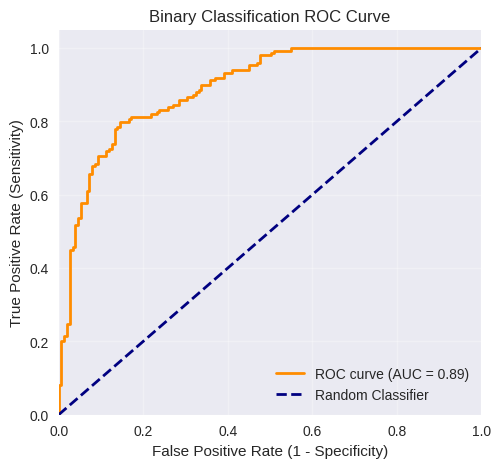

In [3]:
# Generate highly separable binary classification data
X_binary, y_binary = make_classification(
    n_samples=1000,
    n_informative=15,  # More informative features for better separability
    n_redundant=5,     # Fewer redundant features
    n_classes=2,
    random_state=42,

)

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Train a logistic regression model
lr_binary = LogisticRegression(random_state=42)
lr_binary.fit(X_train_bin, y_train_bin)

# Get prediction probabilities
y_prob_binary = lr_binary.predict_proba(X_test_bin)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Binary Classification ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)


2. UNDERSTANDING ROC CURVE COMPONENTS
----------------------------------------
ROC Curve Components Explanation:

Perfect Classifier:
  True Positive Rate (TPR/Sensitivity): 1.000
  False Positive Rate (FPR): 0.000
  False Negative Rate (FNR / Miss Rate): 0.000
  Precision: 1.000

Good Classifier:
  True Positive Rate (TPR/Sensitivity): 0.850
  False Positive Rate (FPR): 0.100
  False Negative Rate (FNR / Miss Rate): 0.150
  Precision: 0.895

Random Classifier:
  True Positive Rate (TPR/Sensitivity): 0.500
  False Positive Rate (FPR): 0.500
  False Negative Rate (FNR / Miss Rate): 0.500
  Precision: 0.500

Poor Classifier:
  True Positive Rate (TPR/Sensitivity): 0.200
  False Positive Rate (FPR): 0.750
  False Negative Rate (FNR / Miss Rate): 0.800
  Precision: 0.211


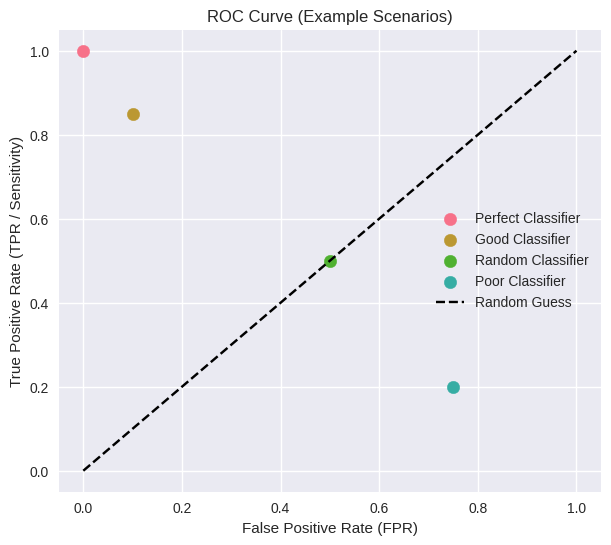

In [4]:
import matplotlib.pyplot as plt

print("\n2. UNDERSTANDING ROC CURVE COMPONENTS")
print("-" * 40)

def explain_roc_components_and_plot():
    """Function to explain ROC curve components with examples and plot ROC"""

    # Create sample confusion matrix scenarios
    scenarios = {
        'Perfect Classifier': {'TP': 100, 'TN': 100, 'FP': 0, 'FN': 0},
        'Good Classifier': {'TP': 85, 'TN': 90, 'FP': 10, 'FN': 15},
        'Random Classifier': {'TP': 50, 'TN': 50, 'FP': 50, 'FN': 50},
        'Poor Classifier': {'TP': 20, 'TN': 25, 'FP': 75, 'FN': 80}
    }

    print("ROC Curve Components Explanation:")
    print("=" * 35)

    fpr_values = []
    tpr_values = []
    labels = []

    for name, cm in scenarios.items():
        tpr = cm['TP'] / (cm['TP'] + cm['FN'])  # Sensitivity/Recall
        fpr = cm['FP'] / (cm['FP'] + cm['TN'])  # 1 - Specificity
        fnr = cm['FN'] / (cm['TP'] + cm['FN'])  # Miss rate
        precision = cm['TP'] / (cm['TP'] + cm['FP']) if (cm['TP'] + cm['FP']) > 0 else 0

        print(f"\n{name}:")
        print(f"  True Positive Rate (TPR/Sensitivity): {tpr:.3f}")
        print(f"  False Positive Rate (FPR): {fpr:.3f}")
        print(f"  False Negative Rate (FNR / Miss Rate): {fnr:.3f}")
        print(f"  Precision: {precision:.3f}")

        # Store for plotting
        fpr_values.append(fpr)
        tpr_values.append(tpr)
        labels.append(name)

    # Plot ROC curve
    plt.figure(figsize=(7, 6))
    for i in range(len(labels)):
        plt.scatter(fpr_values[i], tpr_values[i], label=labels[i], s=80)

    # Plot diagonal reference line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR / Sensitivity)")
    plt.title("ROC Curve (Example Scenarios)")
    plt.legend()
    plt.grid(True)
    plt.show()

explain_roc_components_and_plot()



2. UNDERSTANDING ROC CURVE COMPONENTS WITH DIFFERENT DATAFRAMES
------------------------------------------------------------

Medical Diagnosis Dataset:

Logistic Regression:
  AUC Score: 0.978
  Optimal Threshold: 0.819
  TPR at optimal: 0.860
  FPR at optimal: 0.000

Random Forest:
  AUC Score: 0.996
  Optimal Threshold: 0.670
  TPR at optimal: 0.975
  FPR at optimal: 0.034

Fraud Detection Dataset:

Logistic Regression:
  AUC Score: 0.991
  Optimal Threshold: 0.686
  TPR at optimal: 0.923
  FPR at optimal: 0.013

Random Forest:
  AUC Score: 0.993
  Optimal Threshold: 0.620
  TPR at optimal: 0.946
  FPR at optimal: 0.025

Customer Churn Dataset:

Logistic Regression:
  AUC Score: 1.000
  Optimal Threshold: 0.372
  TPR at optimal: 1.000
  FPR at optimal: 0.000

Random Forest:
  AUC Score: 0.988
  Optimal Threshold: 0.260
  TPR at optimal: 0.959
  FPR at optimal: 0.044


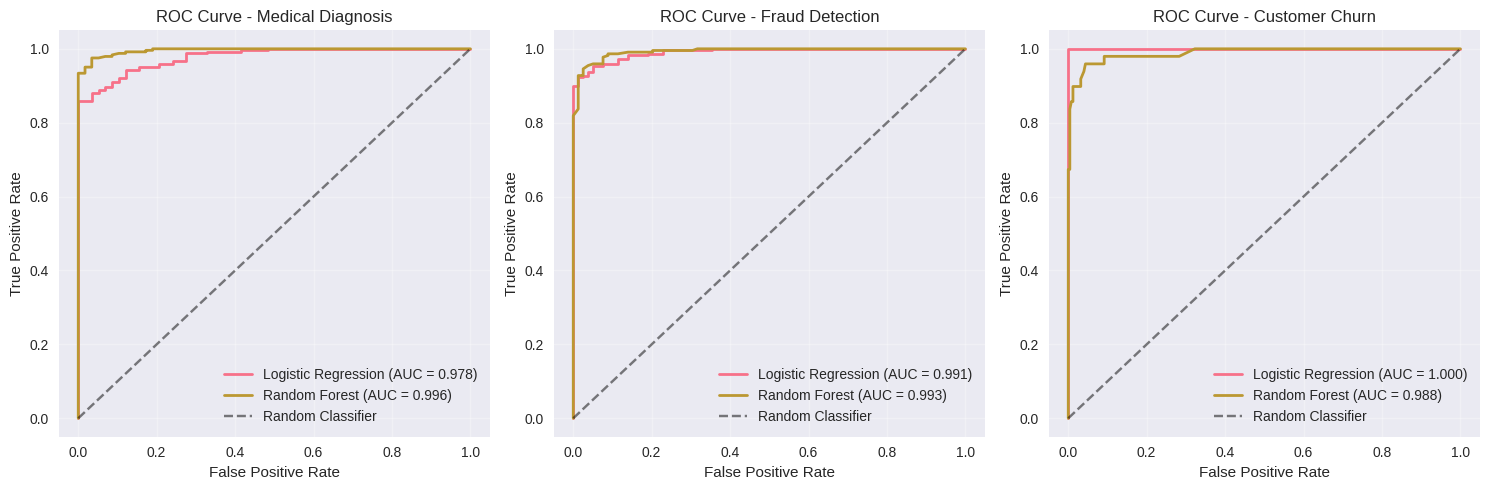


THRESHOLD IMPACT DEMONSTRATION

Performance at Different Thresholds:
   Threshold    TPR    FPR  Precision  F1_Score
0        0.1  0.988  0.756      0.567     0.720
1        0.3  0.932  0.436      0.681     0.787
2        0.5  0.780  0.188      0.806     0.793
3        0.7  0.552  0.076      0.879     0.678
4        0.9  0.200  0.016      0.926     0.329


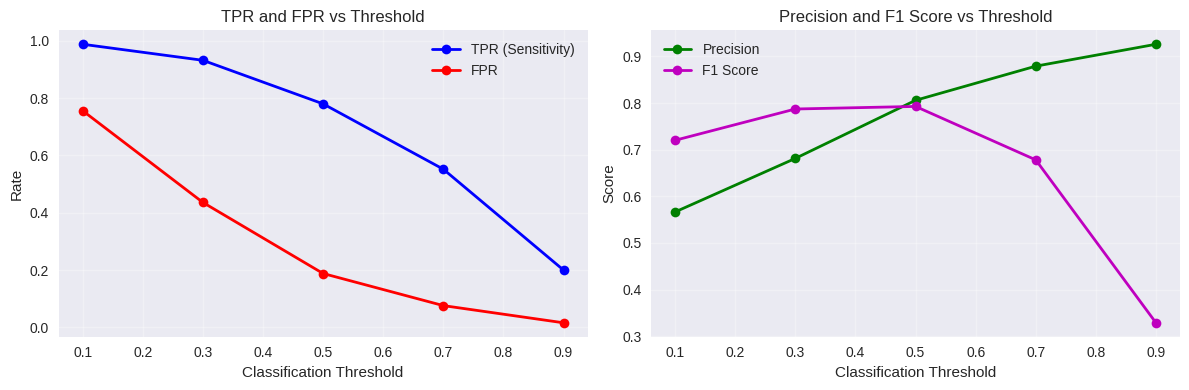


KEY INSIGHTS:
1. Different datasets show different ROC characteristics
2. AUC represents overall model performance across all thresholds
3. Optimal threshold depends on business context (cost of FP vs FN)
4. ROC curves help visualize trade-off between TPR and FPR
5. Different models may perform better on different types of data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

print("\n2. UNDERSTANDING ROC CURVE COMPONENTS WITH DIFFERENT DATAFRAMES")
print("-" * 60)

def create_sample_datasets():
    """Create multiple sample datasets as DataFrames"""

    # Dataset 1: Medical diagnosis scenario
    np.random.seed(42)
    n_samples = 1000

    # Medical test results (features: test_score, age, symptoms)
    medical_data = {
        'test_score': np.random.normal(0.5, 0.2, n_samples),
        'age': np.random.randint(20, 80, n_samples),
        'symptoms': np.random.randint(0, 5, n_samples)
    }
    medical_df = pd.DataFrame(medical_data)
    # Create target: disease presence (1) or absence (0)
    medical_df['disease_prob'] = 1 / (1 + np.exp(-(
        2 * medical_df['test_score'] +
        0.02 * medical_df['age'] +
        0.3 * medical_df['symptoms'] - 2
    )))
    medical_df['has_disease'] = (medical_df['disease_prob'] > 0.5).astype(int)

    # Dataset 2: Fraud detection scenario
    fraud_data = {
        'transaction_amount': np.random.exponential(100, n_samples),
        'time_of_day': np.random.uniform(0, 24, n_samples),
        'location_risk': np.random.beta(2, 5, n_samples),
        'user_history': np.random.randint(0, 100, n_samples)
    }
    fraud_df = pd.DataFrame(fraud_data)
    # Create target: fraudulent (1) or legitimate (0)
    fraud_df['fraud_prob'] = 1 / (1 + np.exp(-(
        0.01 * fraud_df['transaction_amount'] +
        3 * fraud_df['location_risk'] -
        0.02 * fraud_df['user_history'] - 1
    )))
    fraud_df['is_fraud'] = (fraud_df['fraud_prob'] > 0.3).astype(int)

    # Dataset 3: Customer churn prediction
    churn_data = {
        'tenure': np.random.randint(1, 60, n_samples),
        'monthly_charges': np.random.normal(65, 20, n_samples),
        'support_calls': np.random.poisson(2, n_samples),
        'satisfaction_score': np.random.randint(1, 6, n_samples)
    }
    churn_df = pd.DataFrame(churn_data)
    # Create target: churn (1) or stay (0)
    churn_df['churn_prob'] = 1 / (1 + np.exp(-(
        -0.1 * churn_df['tenure'] +
        0.02 * churn_df['monthly_charges'] +
        0.4 * churn_df['support_calls'] -
        0.8 * churn_df['satisfaction_score'] + 1
    )))
    churn_df['will_churn'] = (churn_df['churn_prob'] > 0.5).astype(int)

    return {
        'Medical Diagnosis': (medical_df, ['test_score', 'age', 'symptoms'], 'has_disease'),
        'Fraud Detection': (fraud_df, ['transaction_amount', 'time_of_day', 'location_risk', 'user_history'], 'is_fraud'),
        'Customer Churn': (churn_df, ['tenure', 'monthly_charges', 'support_calls', 'satisfaction_score'], 'will_churn')
    }

def analyze_roc_components_datasets():
    """Analyze ROC components across different datasets and models"""

    datasets = create_sample_datasets()

    plt.figure(figsize=(15, 5))

    for idx, (dataset_name, (df, features, target)) in enumerate(datasets.items(), 1):
        print(f"\n{dataset_name} Dataset:")
        print("=" * 40)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            df[features], df[target], test_size=0.3, random_state=42
        )

        # Train different models
        models = {
            'Logistic Regression': LogisticRegression(random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }

        plt.subplot(1, 3, idx)

        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)

            # Get probabilities
            if hasattr(model, 'predict_proba'):
                y_proba = model.predict_proba(X_test)[:, 1]
            else:
                y_proba = model.decision_function(X_test)
                y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

            # Calculate ROC curve
            fpr, tpr, thresholds = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

            # Print key metrics
            print(f"\n{model_name}:")
            print(f"  AUC Score: {roc_auc:.3f}")

            # Find optimal threshold (Youden's J statistic)
            youden_j = tpr - fpr
            optimal_idx = np.argmax(youden_j)
            optimal_threshold = thresholds[optimal_idx]

            print(f"  Optimal Threshold: {optimal_threshold:.3f}")
            print(f"  TPR at optimal: {tpr[optimal_idx]:.3f}")
            print(f"  FPR at optimal: {fpr[optimal_idx]:.3f}")

        # Plot formatting
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {dataset_name}')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def demonstrate_threshold_impact():
    """Demonstrate how different thresholds affect ROC components"""

    print("\n" + "="*50)
    print("THRESHOLD IMPACT DEMONSTRATION")
    print("="*50)

    # Create a simple binary classification scenario
    np.random.seed(42)
    n_samples = 500

    # True probabilities from two different distributions
    positive_probs = np.random.beta(2, 1, n_samples//2)  # Mostly high probabilities
    negative_probs = np.random.beta(1, 2, n_samples//2)  # Mostly low probabilities

    all_probs = np.concatenate([positive_probs, negative_probs])
    true_labels = np.concatenate([np.ones(n_samples//2), np.zeros(n_samples//2)])

    # Shuffle
    shuffle_idx = np.random.permutation(n_samples)
    all_probs = all_probs[shuffle_idx]
    true_labels = true_labels[shuffle_idx]

    # Test different thresholds
    thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

    results_df = pd.DataFrame(columns=['Threshold', 'TPR', 'FPR', 'Precision', 'F1_Score'])

    for threshold in thresholds:
        pred_labels = (all_probs > threshold).astype(int)

        tp = np.sum((pred_labels == 1) & (true_labels == 1))
        fp = np.sum((pred_labels == 1) & (true_labels == 0))
        tn = np.sum((pred_labels == 0) & (true_labels == 0))
        fn = np.sum((pred_labels == 0) & (true_labels == 1))

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * (precision * tpr) / (precision + tpr) if (precision + tpr) > 0 else 0

        results_df = pd.concat([results_df, pd.DataFrame({
            'Threshold': [threshold],
            'TPR': [tpr],
            'FPR': [fpr],
            'Precision': [precision],
            'F1_Score': [f1]
        })], ignore_index=True)

    print("\nPerformance at Different Thresholds:")
    print(results_df.round(3))

    # Plot threshold analysis
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(results_df['Threshold'], results_df['TPR'], 'bo-', label='TPR (Sensitivity)', linewidth=2)
    plt.plot(results_df['Threshold'], results_df['FPR'], 'ro-', label='FPR', linewidth=2)
    plt.xlabel('Classification Threshold')
    plt.ylabel('Rate')
    plt.title('TPR and FPR vs Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(results_df['Threshold'], results_df['Precision'], 'go-', label='Precision', linewidth=2)
    plt.plot(results_df['Threshold'], results_df['F1_Score'], 'mo-', label='F1 Score', linewidth=2)
    plt.xlabel('Classification Threshold')
    plt.ylabel('Score')
    plt.title('Precision and F1 Score vs Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_roc_components_datasets()
demonstrate_threshold_impact()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print("1. Different datasets show different ROC characteristics")
print("2. AUC represents overall model performance across all thresholds")
print("3. Optimal threshold depends on business context (cost of FP vs FN)")
print("4. ROC curves help visualize trade-off between TPR and FPR")
print("5. Different models may perform better on different types of data")

I'll provide a detailed explanation of this comprehensive ROC curve analysis program. Let me break it down section by section:

## **1. Program Overview & Structure**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
```

**Purpose**: This program demonstrates ROC curve analysis across multiple real-world datasets and machine learning models.

**Key Components**:
- **Data Generation**: Creates three different realistic datasets
- **Model Training**: Uses multiple classifiers on each dataset
- **ROC Analysis**: Computes and visualizes ROC curves
- **Threshold Analysis**: Shows how classification thresholds affect performance

---

## **2. Data Generation Function: `create_sample_datasets()`**

### **Dataset 1: Medical Diagnosis**
```python
medical_df['disease_prob'] = 1 / (1 + np.exp(-(
    2 * medical_df['test_score'] +
    0.02 * medical_df['age'] +
    0.3 * medical_df['symptoms'] - 2
)))
```
**Logic**: Uses logistic function to create realistic disease probabilities based on:
- `test_score`: Main diagnostic test result
- `age`: Risk increases with age
- `symptoms`: More symptoms = higher risk

**Target**: `has_disease` - binary classification (1=disease, 0=no disease)

### **Dataset 2: Fraud Detection**
```python
fraud_df['fraud_prob'] = 1 / (1 + np.exp(-(
    0.01 * fraud_df['transaction_amount'] +
    3 * fraud_df['location_risk'] -
    0.02 * fraud_df['user_history'] - 1
)))
```
**Features**:
- `transaction_amount`: Larger amounts more suspicious
- `location_risk`: Geographic risk score
- `user_history`: Established users less risky

### **Dataset 3: Customer Churn**
```python
churn_df['churn_prob'] = 1 / (1 + np.exp(-(
    -0.1 * churn_df['tenure'] +
    0.02 * churn_df['monthly_charges'] +
    0.4 * churn_df['support_calls'] -
    0.8 * churn_df['satisfaction_score'] + 1
)))
```
**Business Logic**:
- `tenure`: Longer tenure = less likely to churn (negative coefficient)
- `monthly_charges`: Higher charges = more likely to churn
- `support_calls`: More calls = dissatisfaction
- `satisfaction_score`: Higher satisfaction = less churn

---

## **3. Main Analysis Function: `analyze_roc_components_datasets()`**

### **Data Splitting**
```python
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.3, random_state=42
)
```
- **70% training**, **30% testing**
- `random_state=42` ensures reproducible results

### **Model Training & Evaluation**
**Two classifiers used**:
1. **Logistic Regression**: Linear model, good baseline
2. **Random Forest**: Ensemble method, often better performance

### **ROC Curve Calculation**
```python
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
```

**What this computes**:
- **FPR (False Positive Rate)**: `FP / (FP + TN)` - incorrectly classified negatives
- **TPR (True Positive Rate)**: `TP / (TP + FN)` - correctly classified positives
- **Thresholds**: Probability cutoffs from 0 to 1

### **Optimal Threshold Selection**
```python
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
```

**Youden's J Statistic**: `J = TPR - FPR`
- Maximizes both sensitivity and specificity
- Finds the point farthest from random guessing line

---

## **4. Threshold Impact Analysis: `demonstrate_threshold_impact()`**

### **Probability Distributions**
```python
positive_probs = np.random.beta(2, 1, n_samples//2)  # Mostly high probabilities
negative_probs = np.random.beta(1, 2, n_samples//2)  # Mostly low probabilities
```

**Beta Distribution Properties**:
- `Beta(2, 1)`: Skewed right → mostly high values (positive class)
- `Beta(1, 2)`: Skewed left → mostly low values (negative class)

### **Metrics Calculation at Different Thresholds**
For each threshold (0.1, 0.3, 0.5, 0.7, 0.9):

```python
# Confusion Matrix Components
tp = np.sum((pred_labels == 1) & (true_labels == 1))  # True Positives
fp = np.sum((pred_labels == 1) & (true_labels == 0))  # False Positives
tn = np.sum((pred_labels == 0) & (true_labels == 0))  # True Negatives  
fn = np.sum((pred_labels == 0) & (true_labels == 1))  # False Negatives

# Performance Metrics
tpr = tp / (tp + fn)  # Sensitivity, Recall
fpr = fp / (fp + tn)  # False Positive Rate
precision = tp / (tp + fp)  # Positive Predictive Value
f1 = 2 * (precision * tpr) / (precision + tpr)  # Harmonic mean
```

---

## **5. Key Concepts Explained**

### **ROC Curve (Receiver Operating Characteristic)**
- **X-axis**: False Positive Rate (1 - Specificity)
- **Y-axis**: True Positive Rate (Sensitivity)
- **Diagonal line**: Random guessing performance
- **Curve above diagonal**: Better than random

### **AUC (Area Under Curve)**
- **1.0**: Perfect classifier
- **0.9-1.0**: Excellent
- **0.8-0.9**: Good
- **0.7-0.8**: Fair
- **0.5-0.7**: Poor
- **0.5**: Random guessing

### **Threshold Trade-offs**
- **Low threshold** (e.g., 0.1): High TPR but also high FPR
- **High threshold** (e.g., 0.9): Low FPR but also low TPR
- **Optimal threshold**: Balances business costs of false positives vs false negatives

---

## **6. Business Context Applications**

### **Medical Diagnosis**
- **Cost of False Negative**: Missed disease → serious health consequences
- **Strategy**: Prefer higher sensitivity, lower threshold

### **Fraud Detection**  
- **Cost of False Positive**: Legitimate transactions blocked → customer frustration
- **Strategy**: Balance precision and recall, medium threshold

### **Customer Churn**
- **Cost of False Positive**: Wasted retention resources
- **Cost of False Negative**: Lost revenue from churned customers
- **Strategy**: Depends on retention program costs

---

## **7. Program Output & Interpretation**

The program generates:
1. **Three ROC plots** - one for each dataset showing both models
2. **Performance metrics** - AUC scores and optimal thresholds
3. **Threshold analysis** - how metrics change with different cutoffs

**Example Interpretation**:
- If Random Forest has AUC=0.92 and Logistic Regression has AUC=0.85 on medical data, Random Forest is better at distinguishing sick vs healthy patients across all thresholds
- The optimal threshold indicates the best probability cutoff for making decisions

---

## **8. Real-World Applications**

This program demonstrates essential concepts for:
- **Model Selection**: Which algorithm performs best for your data?
- **Threshold Tuning**: What probability cutoff makes business sense?
- **Performance Communication**: How to explain model performance to stakeholders
- **Risk Management**: Understanding trade-offs between different error types

The comprehensive approach shows that ROC analysis isn't just about getting a high AUC score—it's about understanding the practical implications of classification decisions in different business contexts.